In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [20]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]


array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

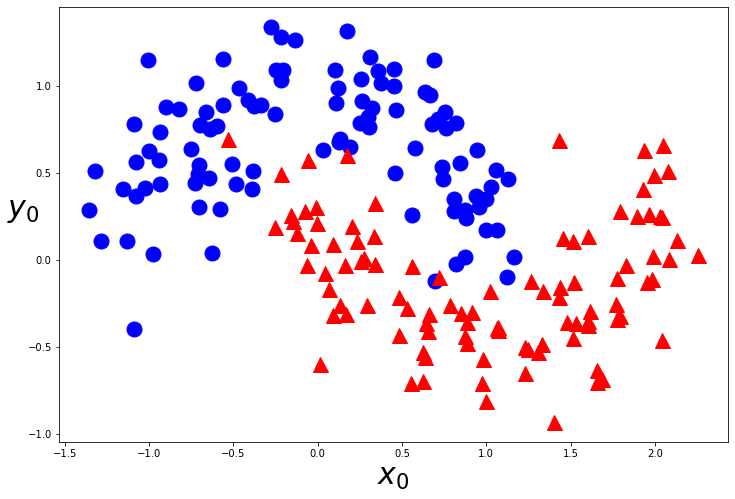

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model,X,y,margin=0.3):
    _x1 = np.linspace(X[:,0].min()-margin, X[:,0].max()+margin,100)
    _x2 = np.linspace(X[:,1].min()-margin, X[:,1].max()+margin,100)
    x1,x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['midiumblue','orangered'])
    plt.contourf(x1,x2,y_pred,alpha-0.3,cmap=custom_cmap)

def plot_datasets(X,y):
    plt.plot(X[:,0][y==0],X[:,1][y==0], "bo", ms=15)
    plt.plot(X[:,0][y==1],X[:,1][y==1], "r^", ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$y_0$",fontsize=30,rotation=0)

plt.figure(figsize=(12,8))
plot_datasets(X,y)
plt.show()





In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

log_reg = LogisticRegression().fit(X_train,y_train)
tree_clf = DecisionTreeClassifier().fit(X_train,y_train)

print(log_reg.score(X_test,y_test))
print(tree_clf.score(X_test,y_test))

0.84
0.98


In [29]:
kfold = KFold(n_splits=5,shuffle=True,random_state=0)


log_reg_score = cross_val_score(log_reg, X, y, cv=kfold)
tree_clf_score = cross_val_score(tree_clf, X, y, cv=kfold)

print(log_reg_score)
print(tree_clf_score)

[0.85  0.875 0.875 0.825 0.775]
[0.975 0.95  0.95  0.95  0.9  ]


In [31]:
print(log_reg_score.mean())
print(tree_clf_score.mean())

0.8400000000000001
0.9450000000000001


In [32]:
from sklearn.metrics import confusion_matrix

In [35]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree_clf = tree_clf.predict(X_test)

cm_log_reg = confusion_matrix(y_test,y_pred_log_reg)
cm_tree_clf = confusion_matrix(y_test,y_pred_tree_clf)
print(cm_log_reg)
print('\n')
print(cm_tree_clf)


[[23  5]
 [ 3 19]]


[[28  0]
 [ 1 21]]


In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [39]:
print('precision log_reg:\n',precision_score(y_test,y_pred_log_reg))
print('\n')
print('precision tree_clf:\n',precision_score(y_test,y_pred_tree_clf))

precision log_reg:
 0.7916666666666666


precision tree_clf:
 1.0


In [40]:
print('recall log_reg:\n',recall_score(y_test,y_pred_log_reg))
print('\n')
print('recall tree_clf:\n',recall_score(y_test,y_pred_tree_clf))

recall log_reg:
 0.8636363636363636


recall tree_clf:
 0.9545454545454546


In [41]:
print('f1_score log_reg:\n',f1_score(y_test,y_pred_log_reg))
print('\n')
print('f1_score tree_clf:\n',f1_score(y_test,y_pred_tree_clf))

f1_score log_reg:
 0.8260869565217391


f1_score tree_clf:
 0.9767441860465117


In [42]:
from sklearn.metrics import precision_recall_curve

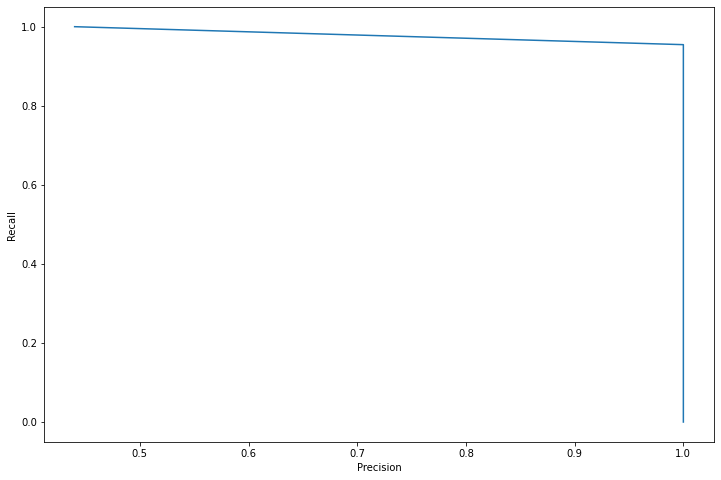

In [45]:
#適合率と再現率はトレードオフの関係にある（右上に行くほど良い）
precision,recall,threshold = precision_recall_curve(y_test,y_pred_tree_clf)

plt.figure(figsize=(12,8))
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


In [48]:
from mglearn.datasets import make_wave

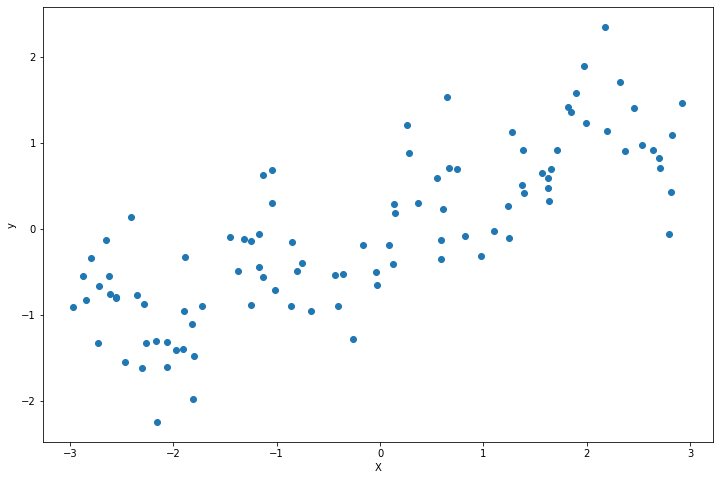

In [50]:
X, y = make_wave(n_samples=100)

plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()



In [51]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split()